# Northwestern Data Analysis - Ovalbumnin

This notebook shows the deconvolution of the ovalbumin standard provided by Northwestern


In [64]:
# Imports and pull in some data
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
from ftir.io.utils import create_df_from_multiple_files
from ftir.modeling.buffer_subtraction import find_buffer_subtraction_constant, buffer_subtract
from ftir.modeling.peak_fitting import gaussian_list, gaussian_least_squares, secondary_structure, sd_baseline_correction, create_fit_plots, gaussian_minimize
from ftir.modeling.peak_definitions import yang_d20_2015, yang_h20_2015
from scipy.spatial import ConvexHull


location = os.getcwd()
h2o_buffer = os.path.abspath("data/H2O Buffer_0.txt")

h2o_samples = ['OVA in H2O_0.txt']
h2o_filenames = [location + '/data/' + i for i in h2o_samples]

h2o_files = [h2o_buffer] + h2o_filenames
h2o_df, a = create_df_from_multiple_files(h2o_filenames)

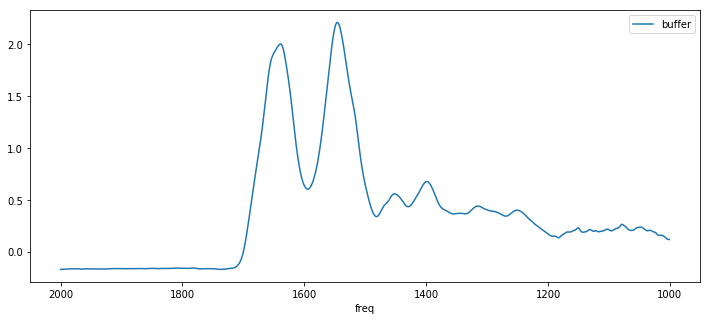

In [65]:
#h2o_sub = buffer_subtract(h2o_df)
ax = h2o_df.plot(x='freq', figsize=(12,5))
ax.invert_xaxis()

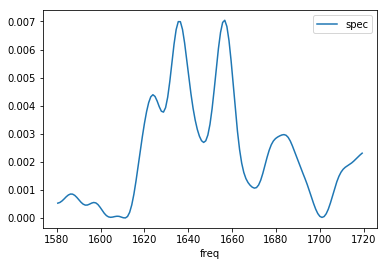

In [66]:
from scipy.signal import savgol_filter
import pandas as pd
import matplotlib.pyplot as plt
sec_der = -1 * savgol_filter(h2o_df.buffer, window_length=9, polyorder=2, deriv=2)
sec_der = sec_der - sec_der.min()
df = pd.DataFrame(data={'freq': h2o_df.freq, 'spec': sec_der})
df.set_index('freq', inplace=True)
df.sort_index(ascending=True, inplace=True)
df = df.truncate(before=1580, after=1720)

df2 = pd.DataFrame(data={'freq':df.index, 'spec': df.spec})
df.plot()

{'alpha_helix': 0.19281537840295185, 'unordered': 0.06019827110625373, 'beta_turn': 0.1444266092073248, '310_helix': 0.032245265069551304, 'beta_sheet': 0.5703144762139185}


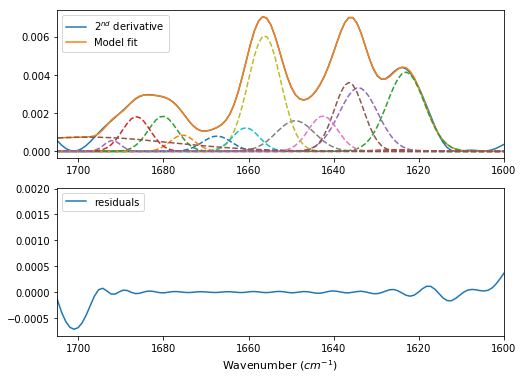

In [67]:
area, res = gaussian_least_squares(df2, df2.columns[1], peaks=yang_h20_2015)
structs = secondary_structure(area, yang_h20_2015)
gaussian_list_data = gaussian_list(df2['freq'], *res.x)
plt = create_fit_plots(df2, df2.columns[1], gaussian_list_data)
print(structs)
plt.show()

{'alpha_helix': 0.22149421162251062, 'unordered': 0.03919286903788835, 'beta_turn': 0.15569915775455154, '310_helix': 0.04908563289550605, 'beta_sheet': 0.5345281286895432}


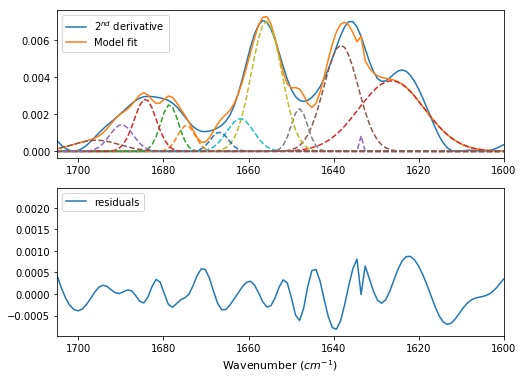

In [68]:
area, res = gaussian_minimize(df2, df2.columns[1], params={'method': 'TNC'})
gaussian_list_data = gaussian_list(df2['freq'], *res.x)
structs = secondary_structure(area, yang_h20_2015)
print(structs)
plt = create_fit_plots(df2, df2.columns[1], gaussian_list_data)
plt.show()

{'alpha_helix': 0.29780569227176695, 'unordered': 0.0, 'beta_turn': 0.1762265657503182, '310_helix': 0.003322744539450947, 'beta_sheet': 0.5226449974384638}


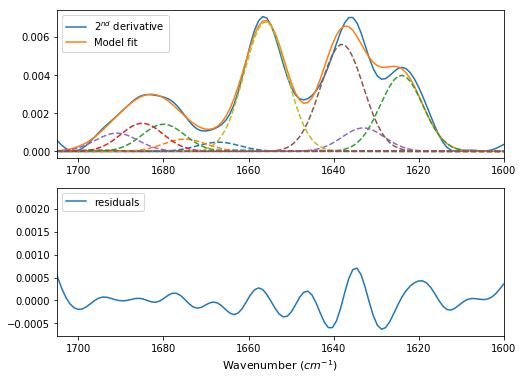

In [69]:
area, res = gaussian_minimize(df2, df2.columns[1], params={'method': 'L-BFGS-B'})
gaussian_list_data = gaussian_list(df2['freq'], *res.x)
structs = secondary_structure(area, yang_h20_2015)
print(structs)
plt = create_fit_plots(df2, df2.columns[1], gaussian_list_data)
plt.show()

{'alpha_helix': 0.2963816507813284, 'unordered': 0.0, 'beta_turn': 0.16543518905332547, '310_helix': 0.02037659551080196, 'beta_sheet': 0.5178065646545442}


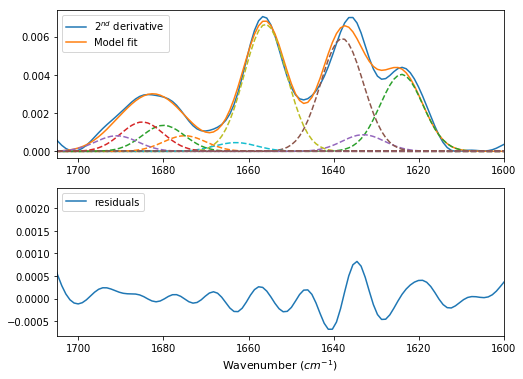

In [70]:
area, res = gaussian_minimize(df2, df2.columns[1], params={'method': 'SLSQP'})
gaussian_list_data = gaussian_list(df2['freq'], *res.x)
structs = secondary_structure(area, yang_h20_2015)
print(structs)
plt = create_fit_plots(df2, df2.columns[1], gaussian_list_data)
plt.show()